In [7]:
import sys
sys.path.insert(0, '..')
import time
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib notebook


import numpy as np

from Configuration import Configuration
from MuscleSpindle import MuscleSpindle

In [8]:
conf = Configuration('confMuscleSpindle.rmto')

In [9]:
t = np.arange(0.0, conf.simDuration_ms, conf.timeStep_ms)
IaFR = np.zeros([len(t), 1])
fBag1 = np.zeros([len(t), 1])
fBag2 = np.zeros([len(t), 1])
fChain = np.zeros([len(t), 1])
TBag1 = np.zeros([len(t), 1])
TBag2 = np.zeros([len(t), 1])
TChain = np.zeros([len(t), 1])

In [10]:
spindle = MuscleSpindle(conf, 'TA')

Muscle spindle from muscle TA built.


<IPython.core.display.Javascript object>


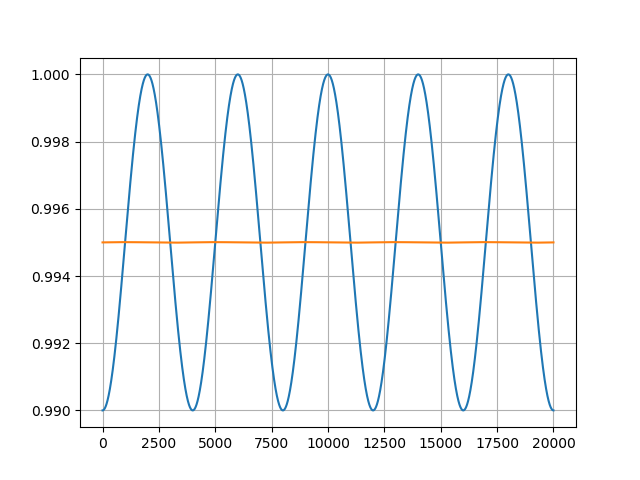

In [11]:
l = np.zeros([len(t), 1])
v = np.zeros([len(t), 1])
a = np.zeros([len(t), 1])
'''
l[0:len(t)/3] = 0.95
v[0:len(t)/3] = 0
a[0:len(t)/3] = 0
a[len(t)/3] = 0*0.118*20
l[len(t)/3:2*len(t)/3,0] = 0.95 + 0.118*(t[len(t)/3:2*len(t)/3]/1000 - 1.1)
v[len(t)/3:2*len(t)/3,0] = 0.118
a[len(t)/3:2*len(t)/3,0] = 0
l[2*len(t)/3:-1] = 1.08
v[2*len(t)/3:-1] = 0
a[2*len(t)/3:-1] = 0
a[2*len(t)/3] = -0*0.118*20
'''
f = 0.25
A = 0.005
l = 0.995 - A*np.cos(2*np.pi*f*t/1000.0)
v = 2*np.pi*f*A*np.sin(2*np.pi*f*t/1000.0)/1000
a = 4*np.pi**2*f**2*A*np.cos(2*np.pi*f*t/1000.0)/1000.0/1000.0
plt.figure()
plt.plot(t,l)

plt.plot(t,v + 0.995)
plt.grid()

In [12]:
tic = time.time()
for i in xrange(0, len(t)-1):
    spindle.atualizeMuscleSpindle(t[i], l[i], v[i], 
                                  a[i], 10, 10)
    IaFR[i] = spindle.IaFR_Hz   
    fBag1[i] = spindle.fusimotorActivation[0]
    fBag2[i] = spindle.fusimotorActivation[1]
    fChain[i] = spindle.fusimotorActivation[2]
    TBag1[i] = spindle.fiberTension[0]
    TBag2[i] = spindle.fiberTension[2]
    TChain[i] = spindle.fiberTension[4]
toc = time.time()
print str(toc - tic) + ' seconds'

12.3638899326 seconds


<IPython.core.display.Javascript object>


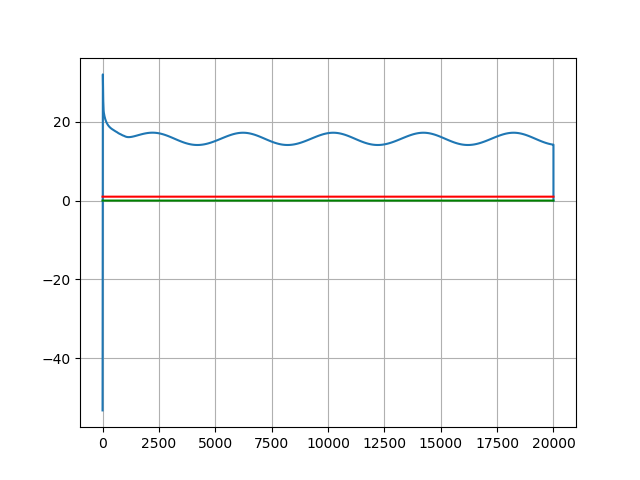

In [13]:
plt.figure()
plt.plot(t,IaFR[:,0])
plt.plot(t,(l),color='red')
plt.plot(t,(v),color='green')
plt.grid()

<IPython.core.display.Javascript object>


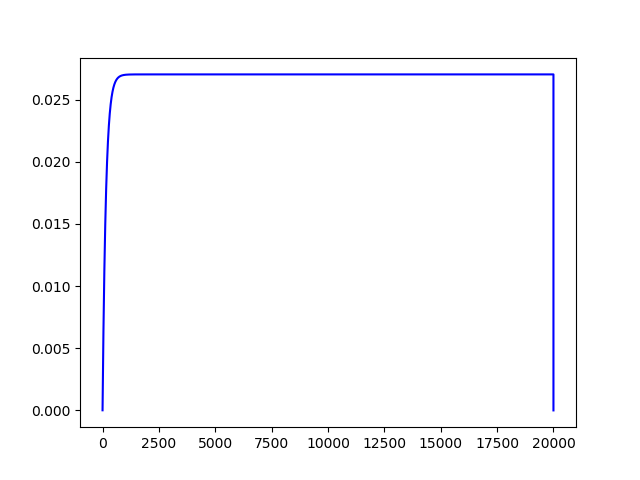

In [14]:
plt.figure()
plt.plot(t, fBag1, color="blue")


<IPython.core.display.Javascript object>


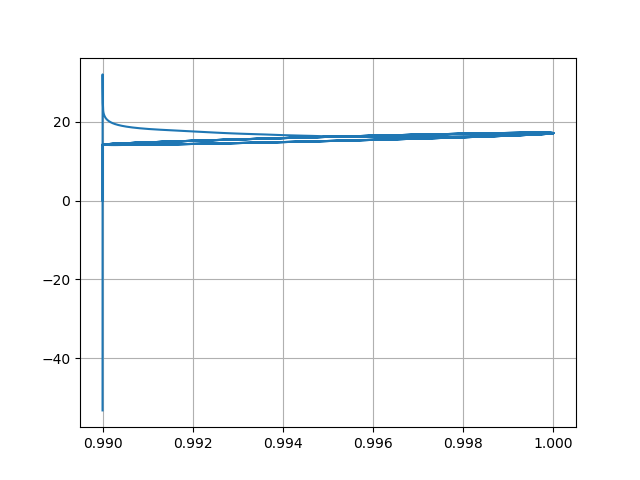

In [15]:
plt.figure()
plt.plot(l,IaFR)
plt.grid()

<IPython.core.display.Javascript object>


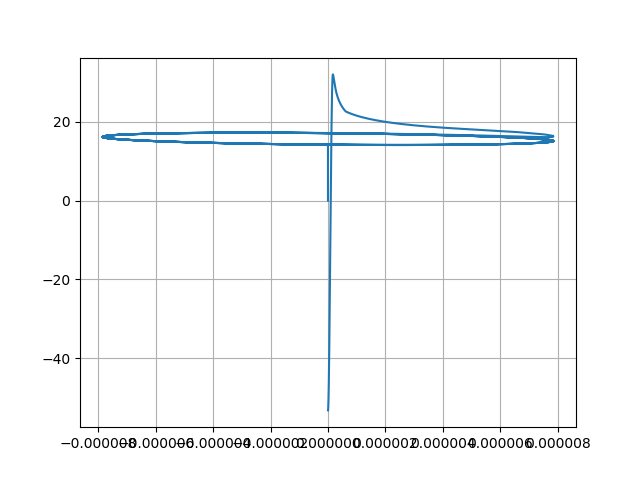

In [16]:
plt.figure()
plt.plot(v,IaFR[:,0])
plt.grid()